In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data_df = pd.read_csv('VehicleData-1.csv')
data_df['DATE'] = pd.to_datetime(data_df['DATE'], format='%m/%d/%y')

display(data_df.head())

,DATE,Total Sales,New Orders
0,2000-01-01,18.635,43668
1,2000-02-01,19.401,39808
2,2000-03-01,18.343,40749
3,2000-04-01,17.939,40644
4,2000-05-01,17.943,38730


Correlation

In [21]:
# Suppose df has 'Cars (millions)' and 'Revenue (millions $)'
data_df['Orders_z'] = (data_df['New Orders'] - data_df['New Orders'].mean()) / data_df['New Orders'].std()
data_df['Sales_z'] = (data_df['Total Sales'] - data_df['Total Sales'].mean()) / data_df['Total Sales'].std()

# Compute correlation
correlation = data_df['Orders_z'].corr(data_df['Sales_z'])
print(correlation)


0.4653179324014264


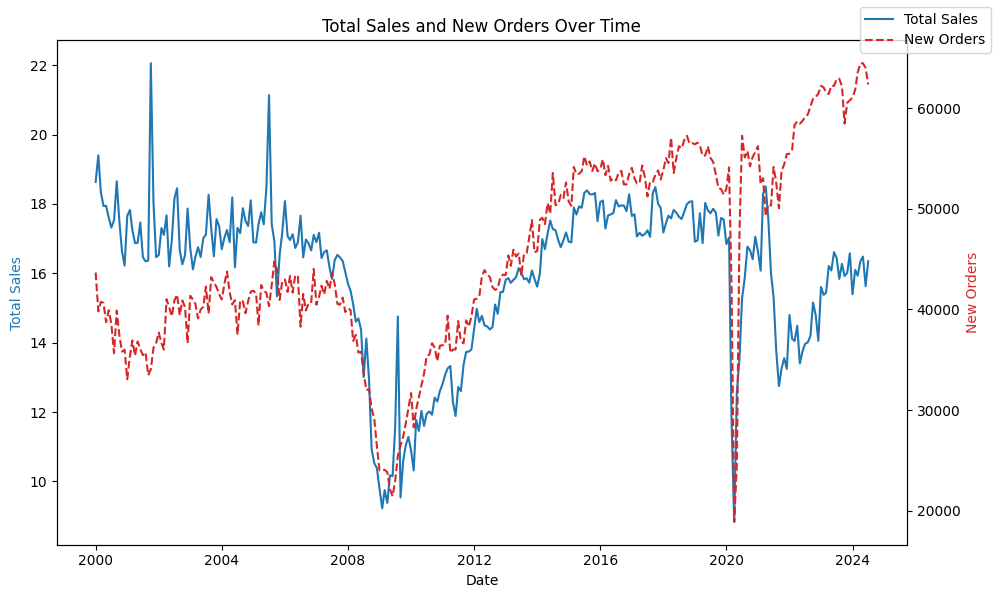

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-axis (Total Sales) ---
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(data_df['DATE'], data_df['Total Sales'], color=color, label='Total Sales')


# --- Right Y-axis (New Orders) ---
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('New Orders', color=color)
ax2.plot(data_df['DATE'], data_df['New Orders'], color=color, linestyle='--', label='New Orders')


plt.title('Total Sales and New Orders Over Time')
fig.tight_layout()
fig.legend()
plt.show()


Additional Data

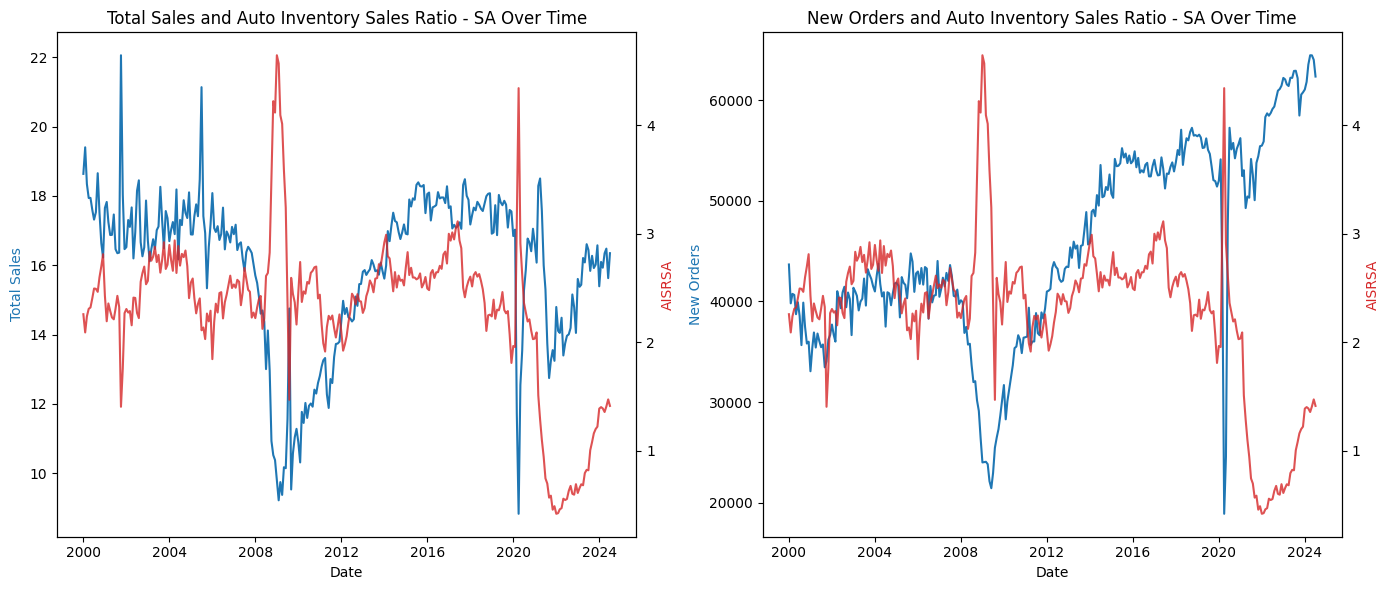

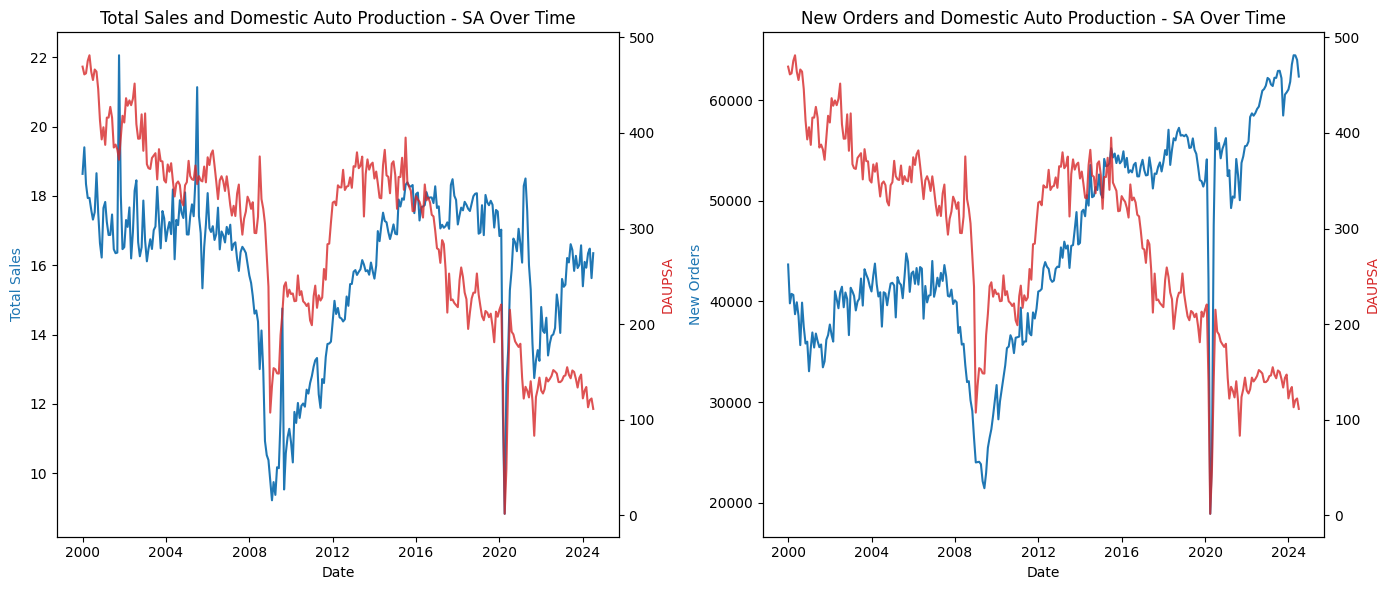

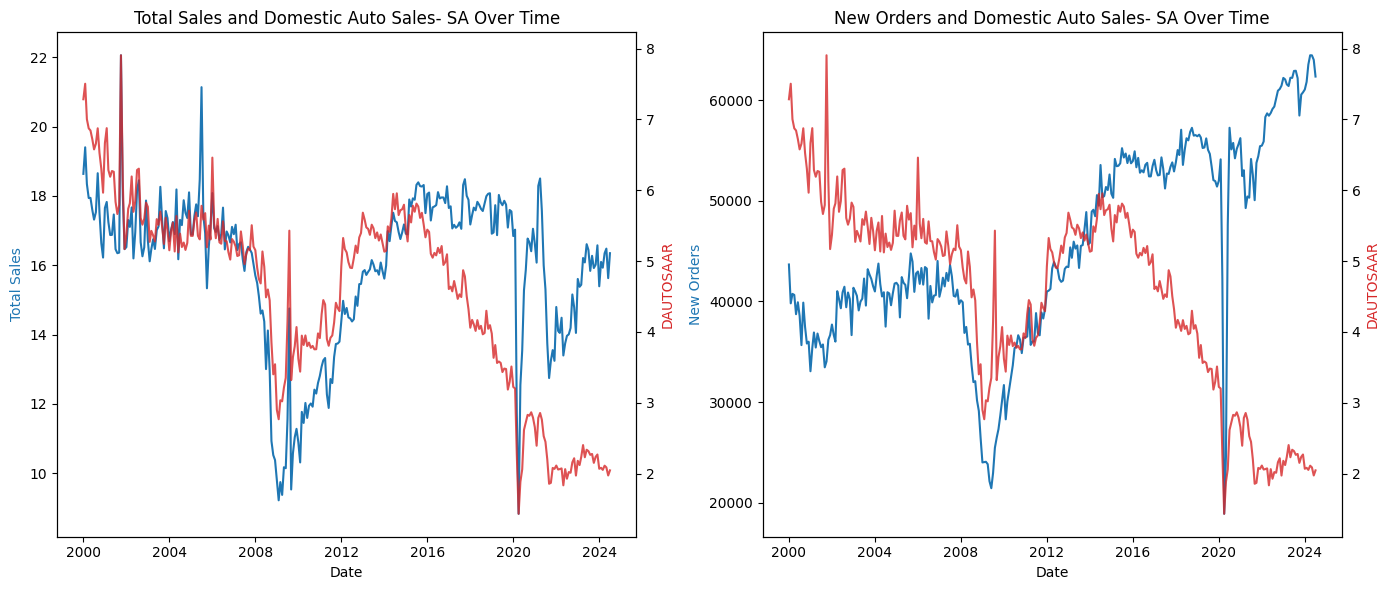

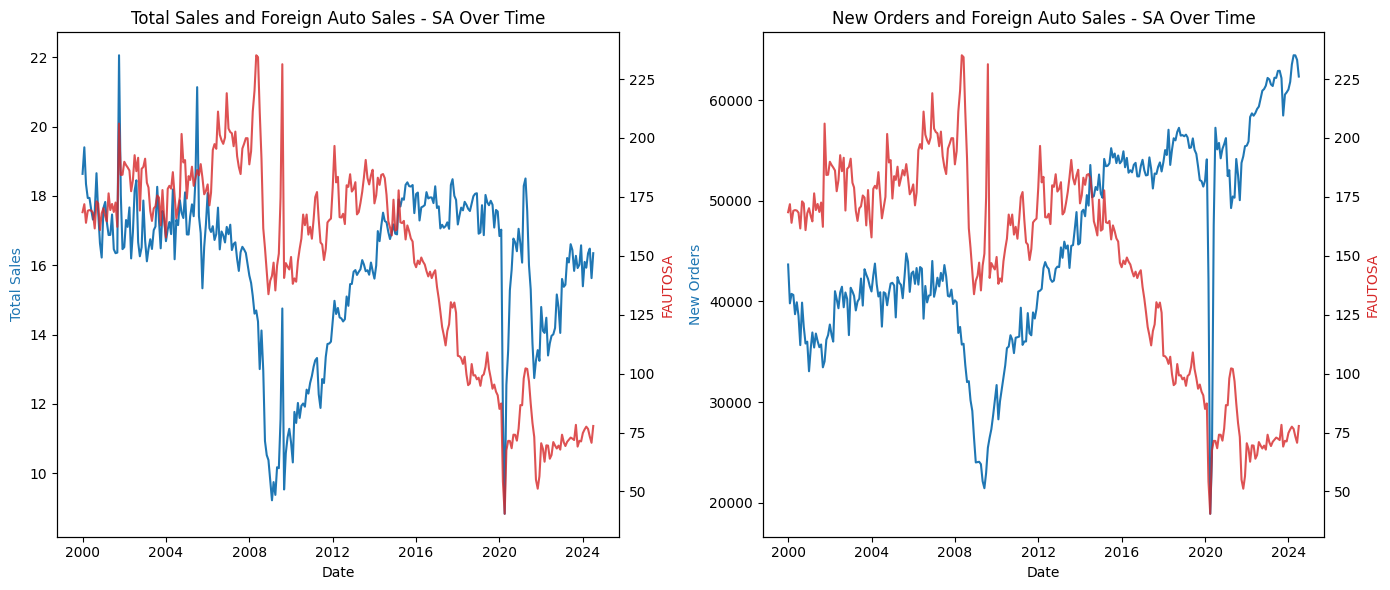

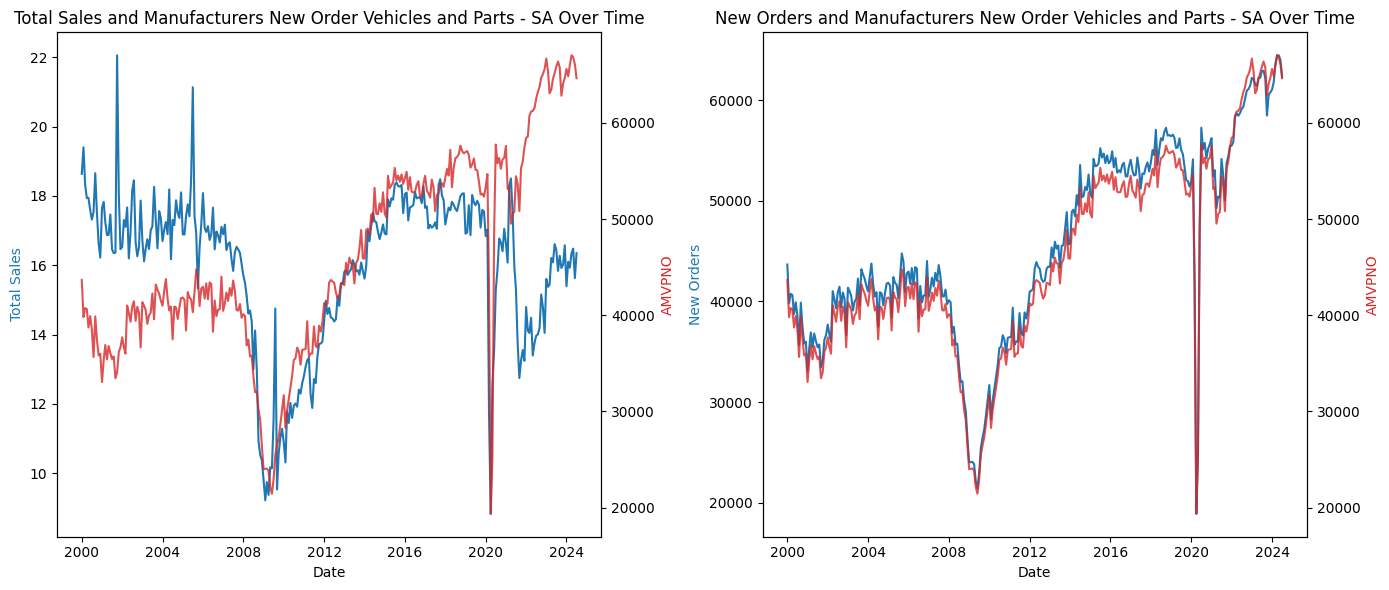

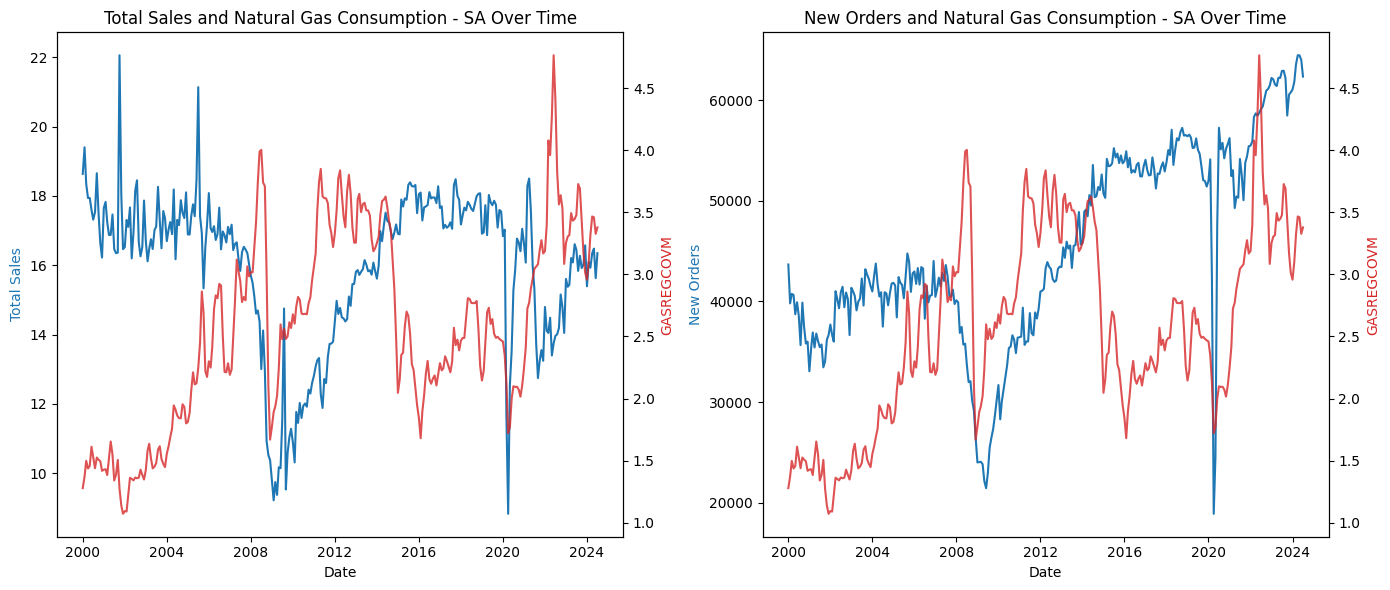

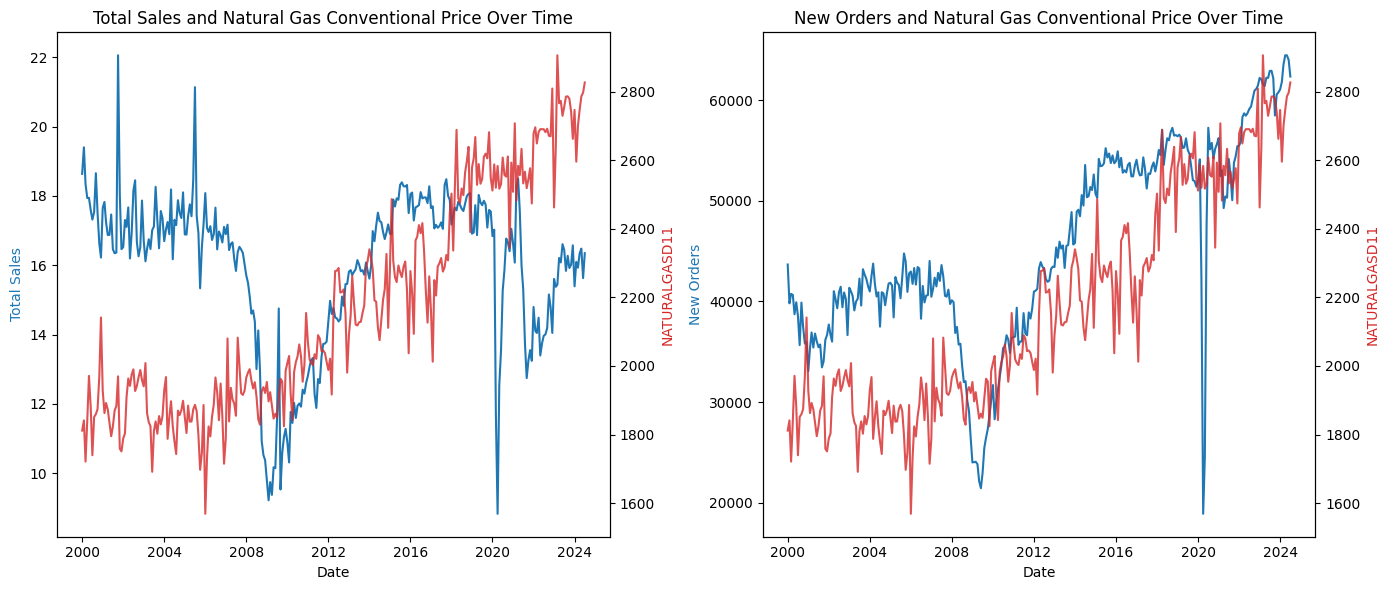

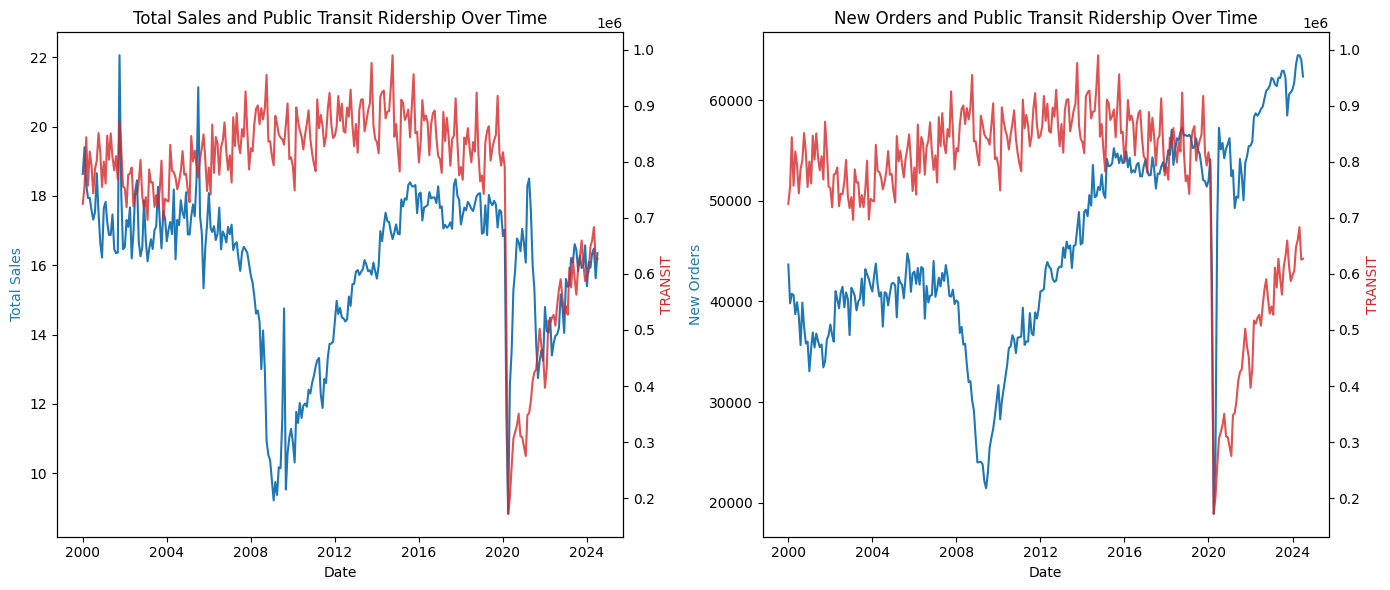

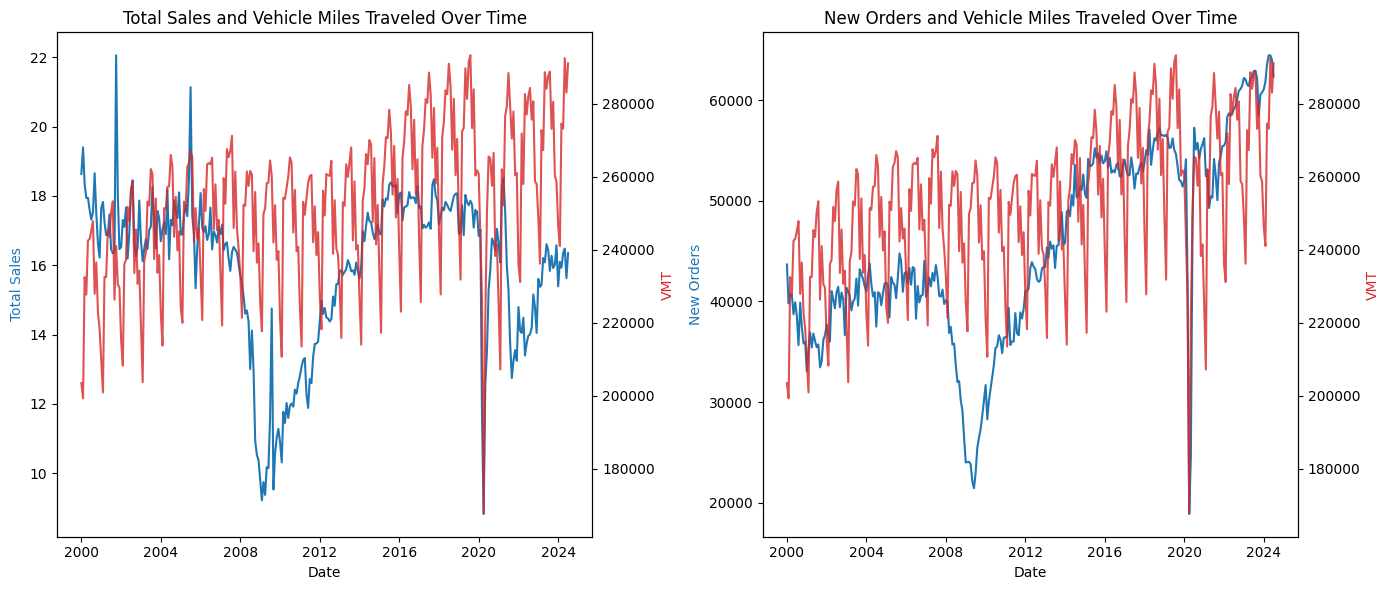

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


folder_path = "Additional Data/*.csv"


def determine_date_col(columns):
    date_col = None
    for col in columns:
        # Common date-like column names
        if 'date' in col.lower() or 'time' in col.lower() or 'day' in col.lower():
            date_col = col
            break

    # If not found, try to infer a datetime-like column
    if date_col is None:
        for col in columns:
            try:
                # Try to parse first few entries
                pd.to_datetime(df[col].head(5))
                date_col = col
                break
            except Exception:
                continue
    return date_col
# Loop through each CSV file
for file_path in glob.glob(folder_path):

    metric = file_path.split('\\')[-1].split('.csv')[0]
    df = pd.read_csv(file_path)
    
    date_col = determine_date_col(df.columns)

    if date_col is None:
        print("❌ No date-like column found — skipping.")
        continue

    try:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    except Exception:
        for fmt in ['%m/%d/%y', '%Y-%m-%d', '%d/%m/%Y']:
            try:
                df[date_col] = pd.to_datetime(df[date_col], format=fmt)
                break
            except Exception:
                continue

    quantity_col = None
    for col in df.columns:
        if col != date_col and df[col].dtype in ['int64', 'float64']:
            quantity_col = col
            break

    if quantity_col is None:
        print("❌ No numeric column found — skipping.")
        continue


    df = df.sort_values(by=date_col)
    df = df[(df[date_col] >= data_df['DATE'].min()) & (df[date_col] <= data_df['DATE'].max())]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # --- Subplot 1: Total Sales ---
    ax1 = axes[0]

    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Sales', color=color)
    ax1.plot(data_df['DATE'], data_df['Total Sales'], color=color, label='Total Sales')

    # Right Y-axis (quantity_col)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(quantity_col, color=color)
    ax2.plot(df[date_col], df[quantity_col], color=color, alpha=0.8, label=metric)
    ax1.set_title(f'Total Sales and {metric} Over Time')

    # --- Subplot 2: New Orders ---
    ax3 = axes[1]

    
    # Left Y-axis (New Orders)
    color = 'tab:blue'
    ax3.set_xlabel('Date')
    ax3.set_ylabel('New Orders', color=color)
    ax3.plot(data_df['DATE'], data_df['New Orders'], color=color, label='New Orders')

    # Right Y-axis (quantity_col)
    ax4 = ax3.twinx()
    color = 'tab:red'
    ax4.set_ylabel(quantity_col, color=color)
    ax4.plot(df[date_col], df[quantity_col], color=color, alpha=0.8, label=metric)
    ax3.set_title(f'New Orders and {metric} Over Time')

    # Adjust layout and add legend
    fig.tight_layout()
    plt.show()



Sales breakdown: Domestic vs Foreign

In [45]:
domestic_sales = pd.read_csv('Additional Data\Domestic Auto Sales- SAAR.csv')
domestic_sales['observation_date'] = pd.to_datetime(domestic_sales['observation_date'], errors='coerce')
domestic_sales = domestic_sales[(domestic_sales['observation_date'] >= data_df['DATE'].min()) & (domestic_sales['observation_date'] <= data_df['DATE'].max())]
#Adjust from SAAR to SA
domestic_sales['DAUTOSA'] = domestic_sales['DAUTOSAAR'] / 12 

foreign_sales = pd.read_csv('Additional Data\Foreign Auto Sales - SA.csv')
foreign_sales['observation_date'] = pd.to_datetime(foreign_sales['observation_date'], errors='coerce')
foreign_sales = foreign_sales[(foreign_sales['observation_date'] >= data_df['DATE'].min()) & (foreign_sales['observation_date'] <= data_df['DATE'].max())]

#Adjust from thousands to millions
foreign_sales['FAUTOSA'] = foreign_sales['FAUTOSA'] * .001


total_sales = data_df[['DATE', 'Total Sales']]
#adjust from SAAR to SA
total_sales['Total Sales'] = total_sales['Total Sales'] /12


C:\Users\iandh\AppData\Local\Temp\ipykernel_18588\4141091691.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sales['Total Sales'] = total_sales['Total Sales'] /12


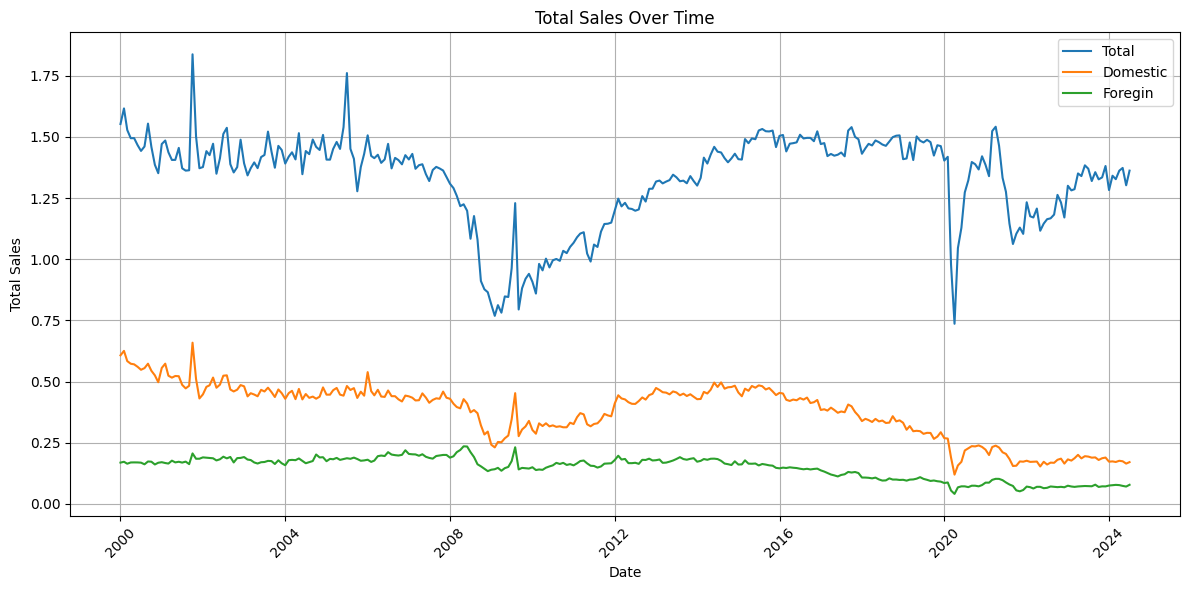

In [43]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(total_sales['DATE'], total_sales['Total Sales'], linestyle='-', label = 'Total')
plt.plot(domestic_sales['observation_date'], domestic_sales['DAUTOSA'], label = 'Domestic')
plt.plot(foreign_sales['observation_date'], foreign_sales['FAUTOSA'], label = 'Foregin')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()